In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3,suppress=True)

In [136]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [137]:
#zestaw danych Auto MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

raw_dataset = pd.read_csv(url,names=column_names, na_values='?', comment='\t', sep=' ',
                          skipinitialspace=True)

In [138]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [139]:
#szybkie czyszczenie danych
dataset.isna().sum()
dataset = dataset.dropna()

In [140]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')


dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [141]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

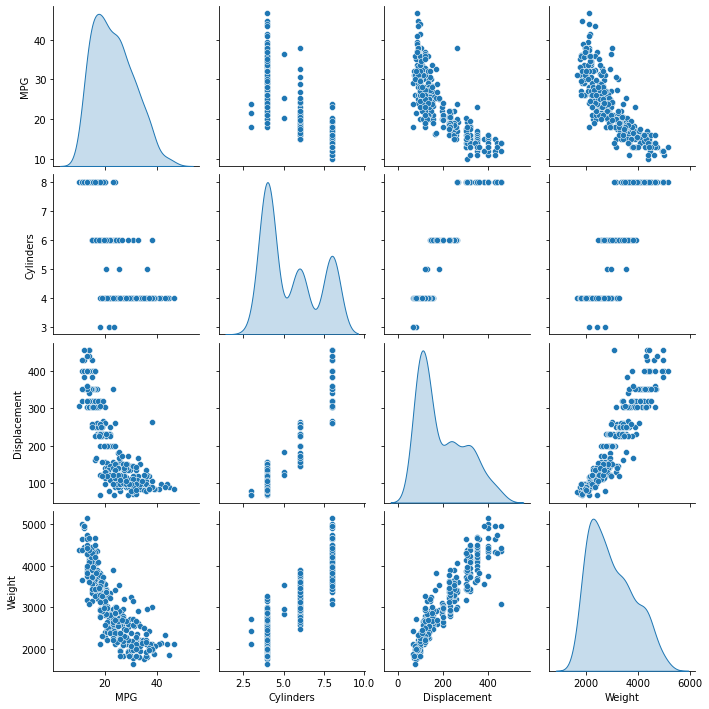

In [142]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [143]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [144]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [145]:
#normalizacja
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [146]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [147]:
first = np.array(train_features[:1])

with np.printoptions(precision=2,suppress = True):
    print(f"Pierwszy przypadek: {first}")
    print()
    print(f'Znormalizowany: {normalizer(first).numpy()}')

Pierwszy przypadek: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Znormalizowany: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


Regrsja z jedną zmienną

In [148]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [149]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


uruchomienie niewytrnowanego modelu w celu prezentacji kształtu danych wyjściowych [10,1]

In [150]:
horsepower_model.predict(horsepower[:10])

array([[-0.599],
       [-0.338],
       [ 1.105],
       [-0.839],
       [-0.759],
       [-0.298],
       [-0.899],
       [-0.759],
       [-0.198],
       [-0.338]], dtype=float32)

In [151]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [152]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 3.09 s, sys: 140 ms, total: 3.23 s
Wall time: 3.22 s


In [153]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804416,4.173589,95
96,3.802775,4.193586,96
97,3.802082,4.198658,97
98,3.807653,4.179528,98
99,3.810164,4.206804,99


In [154]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoka')
  plt.ylabel('błąd[MPG]')
  plt.legend()
  plt.grid(True)

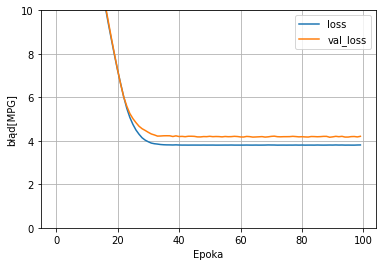

In [155]:
plot_loss(history)

In [156]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [157]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

In [158]:
def plot_horsepower(x,y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Dane')
  plt.plot(x,y,color='k',label='Prognoza')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

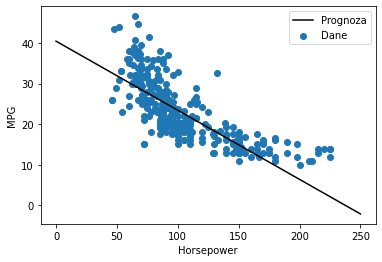

In [159]:
plot_horsepower(x,y)

Regresja liniowa z wieloma danymi wejściowymi

model jest bardzo podobny i reprezentuje funckję y = mx + b, różnica z poprzednikiem jest taka że m tym razem nie reprezentuje pojedyńczej wartości a macierz wartości, natomiast b jest wektorem

In [160]:
linear_model = tf.keras .Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [161]:
linear_model.predict(train_features[:10])

array([[ 1.152],
       [ 0.784],
       [-1.674],
       [ 0.573],
       [ 2.295],
       [ 0.118],
       [ 2.511],
       [ 0.332],
       [ 0.425],
       [ 2.728]], dtype=float32)

In [162]:
#macierz wag w kształcie (9,1)
linear_model.layers[1].kernel

<tf.Variable 'dense_13/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.377],
       [-0.41 ],
       [-0.749],
       [ 0.248],
       [ 0.346],
       [-0.358],
       [-0.247],
       [ 0.765],
       [ 0.37 ]], dtype=float32)>

In [163]:
linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [164]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 3.05 s, sys: 136 ms, total: 3.18 s
Wall time: 3.22 s


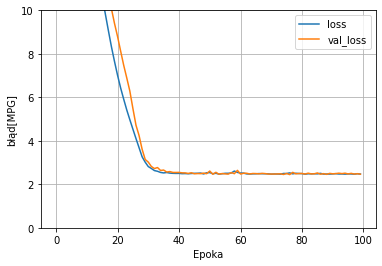

In [165]:
plot_loss(history)

In [166]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels,
    verbose=0
)

przykład regresji z użyciem głębokiej sieci neuronowej (DNN) wprowadzającej warstwy z funckją aktywacji nieliniową

In [167]:
def bulid_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [168]:
dnn_horsepower_model = bulid_and_compile_model(horsepower_normalizer)

In [169]:
dnn_horsepower_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_12 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_14 (Dense)            (None, 64)                128       
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [170]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 3.58 s, sys: 159 ms, total: 3.74 s
Wall time: 3.53 s


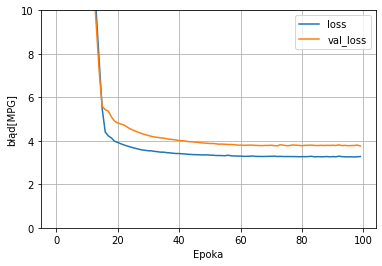

In [171]:
plot_loss(history)

In [172]:
x = tf.linspace(0.0,250,251)
y = dnn_horsepower_model.predict(x)

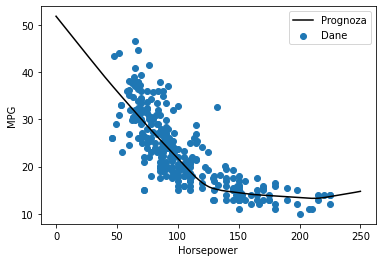

In [173]:
plot_horsepower(x,y)

In [174]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

Regresja z użyciem DNN i wielu danych wejściowych

In [175]:
dnn_model = bulid_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 9)                19        
 tion)                                                           
                                                                 
 dense_17 (Dense)            (None, 64)                640       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [180]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2
)

CPU times: user 3.62 s, sys: 149 ms, total: 3.77 s
Wall time: 3.67 s


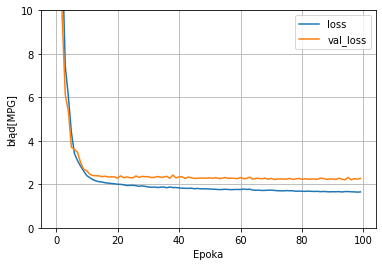

In [181]:
plot_loss(history)

In [182]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels,
    verbose = 0
)

In [183]:
#zestawienie wydajności modeli
pd.DataFrame(test_results, index=['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
horsepower_model,3.635676
linear_model,2.471013
dnn_horsepower_model,2.960439
dnn_model,1.717330


PROGNOZOWANIE

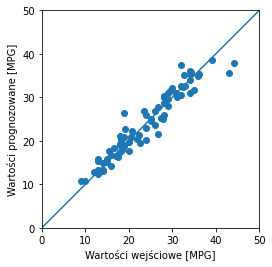

In [187]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels,test_predictions)
plt.xlabel('Wartości wejściowe [MPG]')
plt.ylabel('Wartości prognozowane [MPG]')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

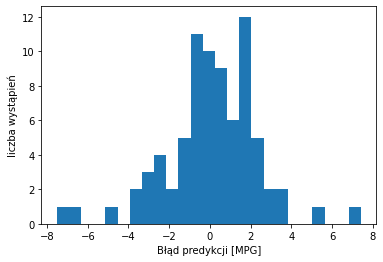

In [188]:
#rozkład błędów
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Błąd predykcji [MPG]")
_ = plt.ylabel("liczba wystąpień")

In [189]:
dnn_model.save('dnn_model')

In [190]:
reloaded = tf.keras.models.load_model('dnn_model')

In [191]:
from tables.tests.common import test_filename
test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=0)

In [192]:
pd.DataFrame(test_results, index = ['Mean Absolute Error [MPG]']).T

,Mean Absolute Error [MPG]
horsepower_model,3.635676
linear_model,2.471013
dnn_horsepower_model,2.960439
dnn_model,1.717330
reloaded,1.717330


jest druga opcja optymalizacyjna z użyciem  błędu -> MSE  - średnio-kwadratowy błąd, tf.losses.MeanAbsoluteError